In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('./Algerian_forest_fires_dataset_UPDATE.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
df['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [8]:
##Dependent and Independent Variables
X=df.drop('FWI',axis=1)
y=df['FWI']

In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [10]:
#feature selection
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.631425,-0.293944,-0.326774,0.648983,0.494801,0.386834,0.567974,0.469734,0.498669,0.274569
RH,-0.631425,1.000000,0.200332,0.244872,-0.641958,-0.422592,-0.244555,-0.683693,-0.369276,-0.424014,-0.402486
Ws,-0.293944,0.200332,1.000000,0.216274,-0.145021,0.015649,0.097829,0.048290,0.044548,-0.065822,-0.221314
Rain,-0.326774,0.244872,0.216274,1.000000,-0.558359,-0.304188,-0.323452,-0.361369,-0.316830,-0.416809,-0.041970
FFMC,0.648983,-0.641958,-0.145021,-0.558359,1.000000,0.618780,0.540755,0.745825,0.608499,0.777483,0.224360
DMC,0.494801,-0.422592,0.015649,-0.304188,0.618780,1.000000,0.888409,0.703885,0.985434,0.610745,0.194657
DC,0.386834,-0.244555,0.097829,-0.323452,0.540755,0.888409,1.000000,0.547247,0.951910,0.568942,-0.067946
ISI,0.567974,-0.683693,0.048290,-0.361369,0.745825,0.703885,0.547247,1.000000,0.664914,0.745333,0.276838
BUI,0.469734,-0.369276,0.044548,-0.316830,0.608499,0.985434,0.951910,0.664914,1.000000,0.611773,0.100235
Classes,0.498669,-0.424014,-0.065822,-0.416809,0.777483,0.610745,0.568942,0.745333,0.611773,1.000000,0.163269


<Axes: >

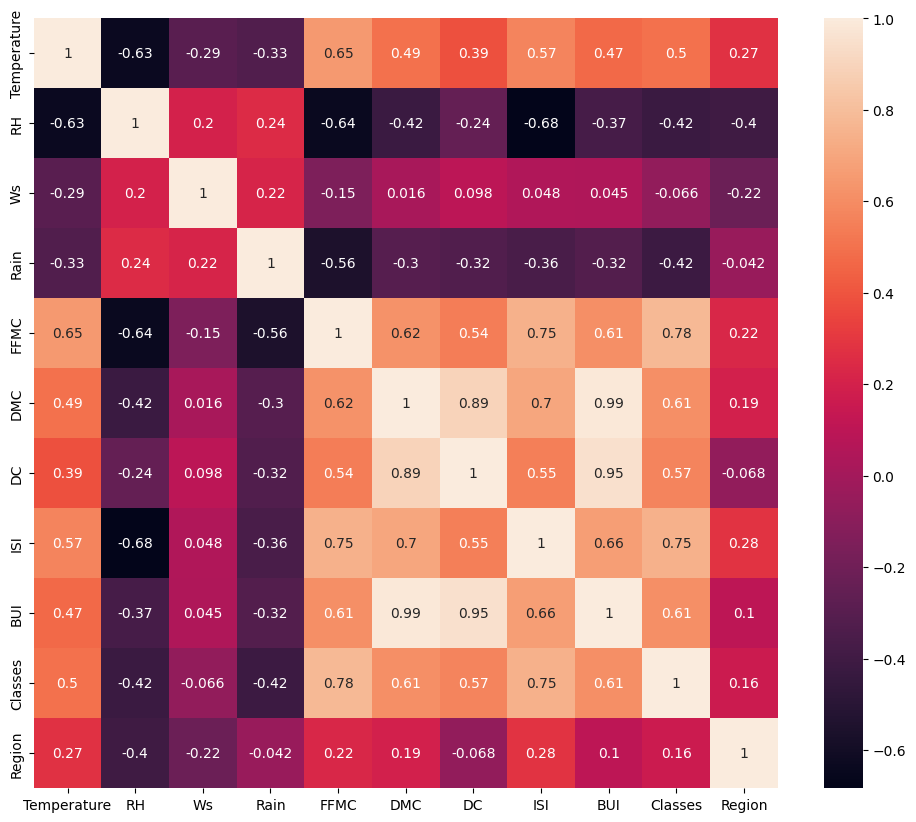

In [11]:
##Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [12]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_martix=dataset.corr()
    for i in range(len(corr_martix.columns)):
        for j in range(i):
            if abs(corr_martix.iloc[i,j]>threshold):
                colname=corr_martix.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features=correlation(X_train,0.85)

In [17]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [18]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
206,33,37,16,0.0,92.2,61.3,13.1,1,1
2,26,82,22,13.1,47.1,2.5,0.3,0,0
25,31,64,18,0.0,86.8,17.8,6.7,1,0
74,33,66,14,0.0,87.0,21.7,5.7,1,0
65,34,65,13,0.0,86.8,11.1,5.2,1,0


In [19]:
#Feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'After Scaling')

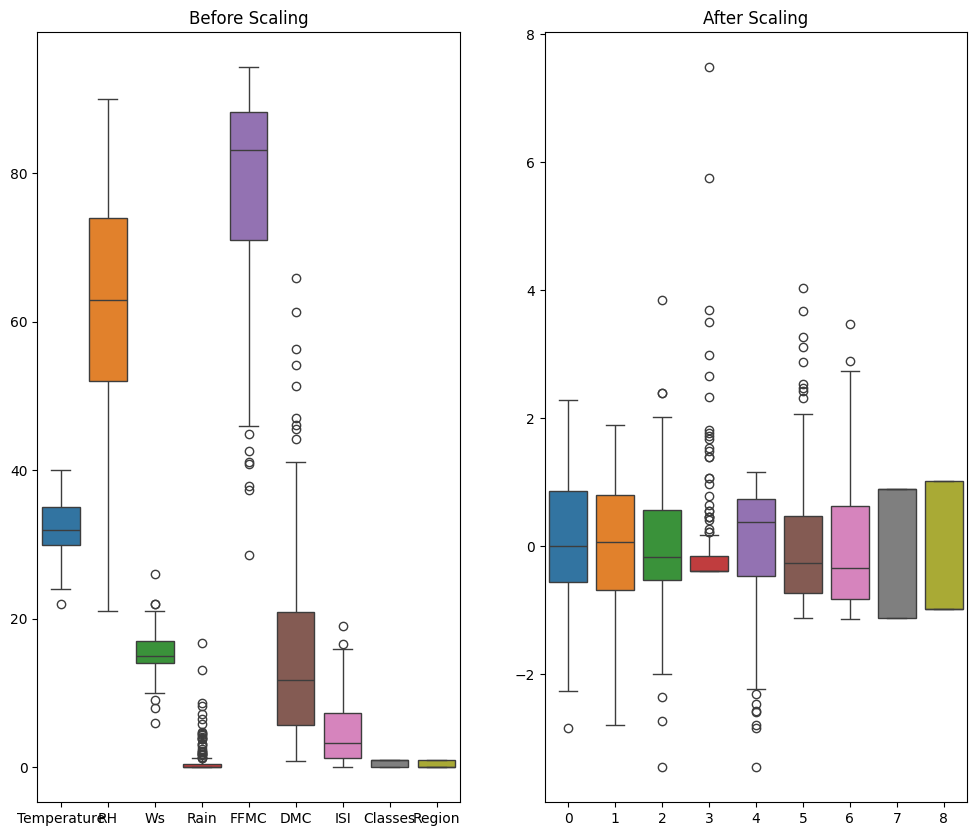

In [20]:
##Box plot to understand the effact of scaling
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('After Scaling')


In [21]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MAE: 0.6673706834782936
MSE: 1.0036111573187372
RMSE: 1.0018039515387915
R2: 0.9803644615198325


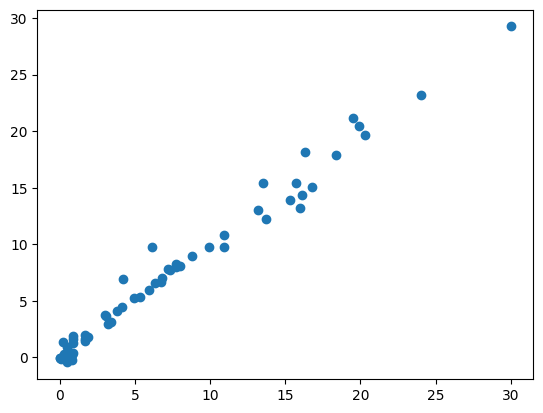

In [22]:
plt.scatter(y_test,y_pred)

In [23]:
##Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
linreg=Lasso()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MAE: 1.243080945126433
MSE: 2.544084485988658
RMSE: 1.5950186475363408
R2: 0.9502252755390975


In [24]:
##Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
linreg=Ridge()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MAE: 0.6851262656041187
MSE: 1.0191211040208181
RMSE: 1.009515281717329
R2: 0.9800610111714847
